In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

#plt.style.use('fivethirtyeight')

In [2]:
path = 'C:/Users/Kate/Downloads/Crypto_dataset/coin_Aave.csv' 
coin = pd.read_csv(path)

coin.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,275.000000,275.000000,275.000000,275.000000,275.000000,2.750000e+02,2.750000e+02
mean,138.000000,271.306751,237.736035,254.506688,255.525845,5.023421e+08,3.168639e+09
std,79.529869,173.030432,151.302431,162.067209,161.649917,4.527200e+08,2.066558e+09
min,1.000000,28.433069,25.966155,27.715080,27.715084,0.000000e+00,6.713004e+07
25%,69.500000,85.078206,76.038104,80.557436,81.100120,2.400042e+08,9.736814e+08
50%,138.000000,306.990536,274.746278,292.268571,295.089229,3.693558e+08,3.697227e+09
75%,206.500000,407.518278,361.685763,382.275163,382.579255,6.204643e+08,4.784464e+09
max,275.000000,666.864979,565.749887,629.231665,632.266488,2.838573e+09,8.063210e+09


In [3]:
coin.shape

(275, 10)

In [4]:
coin[['Symbol','Date', 'High', 'Low', 'Marketcap']].head()

,Symbol,Date,High,Low,Marketcap
0,AAVE,2020-10-05 23:59:59,55.112358,49.787900,8.912813e+07
1,AAVE,2020-10-06 23:59:59,53.402270,40.734578,7.101144e+07
2,AAVE,2020-10-07 23:59:59,42.408314,35.970690,6.713004e+07
3,AAVE,2020-10-08 23:59:59,44.902511,36.696057,2.202651e+08
4,AAVE,2020-10-09 23:59:59,47.569533,43.291776,2.356322e+08


## Simple smoothing

<AxesSubplot:>

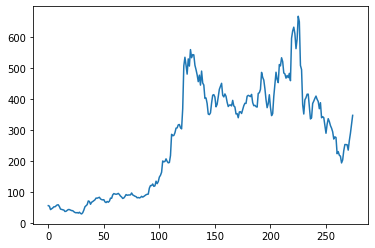

In [5]:
coin['High'].plot()

<AxesSubplot:>

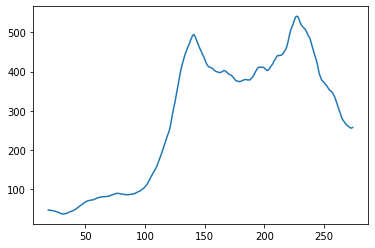

In [6]:
coin['High'].rolling(window =20).mean().plot()

<AxesSubplot:>

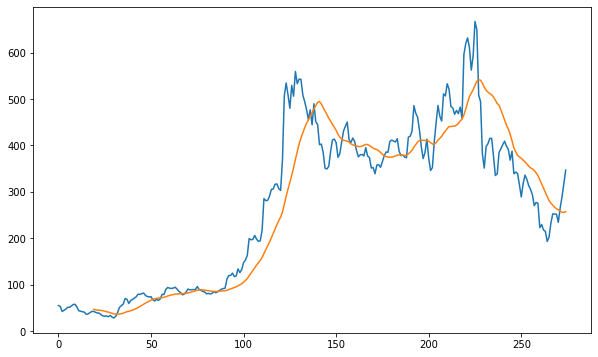

In [7]:
coin['High'].plot(figsize=(10,6))
coin['High'].rolling(window =20).mean().plot()

## Exponental smoothing

In [8]:
datafile = 'C:/Users/Kate/Downloads/Crypto_dataset/coin_Aave.csv'
data = pd.read_csv(datafile, index_col = 'Date')
data.index = pd.to_datetime(data.index)
# We can drop the old index column:
#data = data.drop(columns='Unnamed: 0')
data

,SNo,Name,Symbol,High,Low,Open,Close,Volume,Marketcap
Date,,,,,,,,,
2020-10-05 23:59:59,1,Aave,AAVE,55.112358,49.787900,52.675035,53.219243,0.000000e+00,8.912813e+07
2020-10-06 23:59:59,2,Aave,AAVE,53.402270,40.734578,53.291969,42.401599,5.830915e+05,7.101144e+07
2020-10-07 23:59:59,3,Aave,AAVE,42.408314,35.970690,42.399947,40.083976,6.828342e+05,6.713004e+07
2020-10-08 23:59:59,4,Aave,AAVE,44.902511,36.696057,39.885262,43.764463,1.658817e+06,2.202651e+08
2020-10-09 23:59:59,5,Aave,AAVE,47.569533,43.291776,43.764463,46.817744,8.155377e+05,2.356322e+08
...,...,...,...,...,...,...,...,...,...
2021-07-02 23:59:59,271,Aave,AAVE,234.483957,215.951539,230.814119,233.948437,2.566395e+08,3.001542e+09
2021-07-03 23:59:59,272,Aave,AAVE,265.107342,228.485206,234.208478,259.655225,3.853778e+08,3.331546e+09
2021-07-04 23:59:59,273,Aave,AAVE,289.001124,248.285491,259.399426,277.038792,4.275719e+08,3.555054e+09


In [9]:
weights = np.arange(1,11) 
weights

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [10]:
wma10 = data['High'].rolling(10).apply(lambda prices: np.dot(prices, weights)/weights.sum(), raw=True)
wma10.head(20)

Date
2020-10-05 23:59:59          NaN
2020-10-06 23:59:59          NaN
2020-10-07 23:59:59          NaN
2020-10-08 23:59:59          NaN
2020-10-09 23:59:59          NaN
2020-10-10 23:59:59          NaN
2020-10-11 23:59:59          NaN
2020-10-12 23:59:59          NaN
2020-10-13 23:59:59          NaN
2020-10-14 23:59:59    52.844637
2020-10-15 23:59:59    52.931829
2020-10-16 23:59:59    51.587969
2020-10-17 23:59:59    50.265963
2020-10-18 23:59:59    48.690358
2020-10-19 23:59:59    47.034935
2020-10-20 23:59:59    44.648843
2020-10-21 23:59:59    42.675077
2020-10-22 23:59:59    41.467899
2020-10-23 23:59:59    41.014573
2020-10-24 23:59:59    40.813351
Name: High, dtype: float64

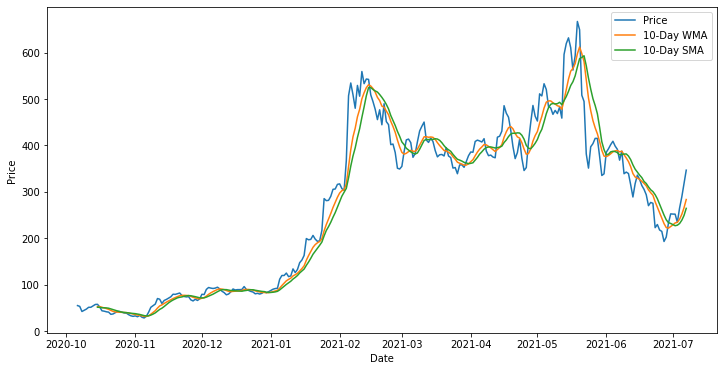

In [21]:
sma10 = data['High'].rolling(10).mean()
plt.figure(figsize = (12,6))
plt.plot(data['High'], label="Price")
plt.plot(wma10, label="10-Day WMA")
plt.plot(sma10, label="10-Day SMA")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [24]:
weights = np.arange(1,4) 
wma3 = data['High'].rolling(3).apply(lambda prices: np.dot(prices, weights)/weights.sum(), raw=True)
wma3.head(20)

Date
2020-10-05 23:59:59          NaN
2020-10-06 23:59:59          NaN
2020-10-07 23:59:59    48.190307
2020-10-08 23:59:59    45.487738
2020-10-09 23:59:59    45.820322
2020-10-10 23:59:59    49.043090
2020-10-11 23:59:59    50.790161
2020-10-12 23:59:59    52.929443
2020-10-13 23:59:59    55.456987
2020-10-14 23:59:59    57.157844
2020-10-15 23:59:59    54.905309
2020-10-16 23:59:59    48.955918
2020-10-17 23:59:59    44.854378
2020-10-18 23:59:59    42.551657
2020-10-19 23:59:59    41.593650
2020-10-20 23:59:59    38.782844
2020-10-21 23:59:59    37.477989
2020-10-22 23:59:59    38.341040
2020-10-23 23:59:59    40.738669
2020-10-24 23:59:59    42.044892
Name: High, dtype: float64

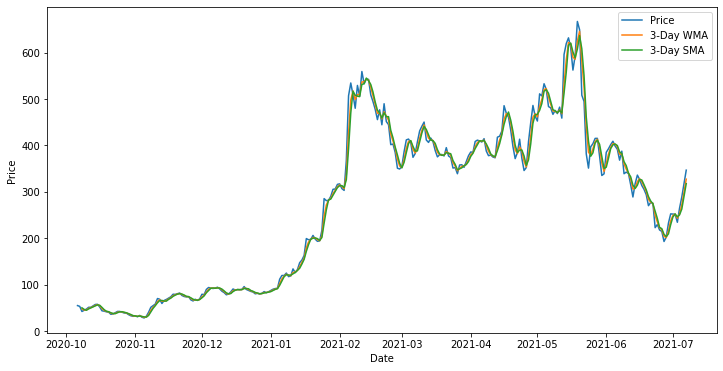

In [26]:
sma3 = data['High'].rolling(3).mean()
plt.figure(figsize = (12,6))
plt.plot(data['High'], label="Price")
plt.plot(wma3, label="3-Day WMA")
plt.plot(sma3, label="3-Day SMA")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

## Correlation

In [12]:
x = data['Close']
y = data['Marketcap']
r = np.corrcoef(x, y)
r

array([[1.        , 0.99912986],
       [0.99912986, 1.        ]])

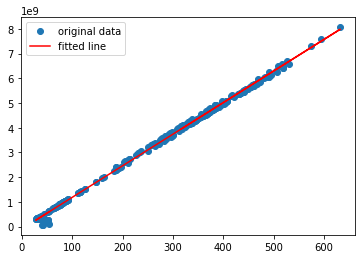

In [13]:
from scipy import stats
res = stats.linregress(x, y)
plt.plot(x, y, 'o', label='original data')
plt.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')
plt.legend()
plt.show()

In [14]:
r[0,1]
r[1,0]

0.9991298600318178

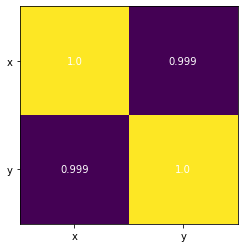

In [15]:
matrix = np.corrcoef(x, y).round(decimals=3)
fig, ax = plt.subplots()
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, matrix[i, j], ha='center', va='center', color='w')
plt.show()

<AxesSubplot:xlabel='Date'>

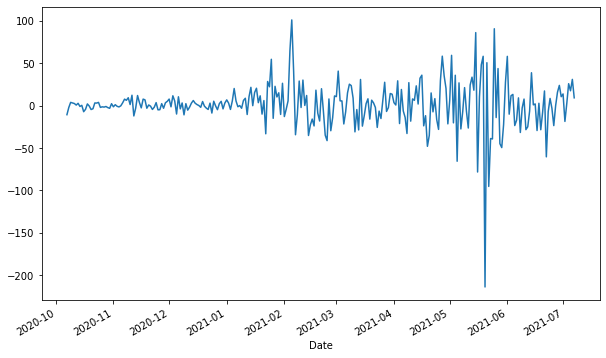

In [16]:
data['Change'] = data.Close.sub(data.Close.shift())
data['Change'].plot(figsize=(10, 6))

<AxesSubplot:xlabel='Date'>

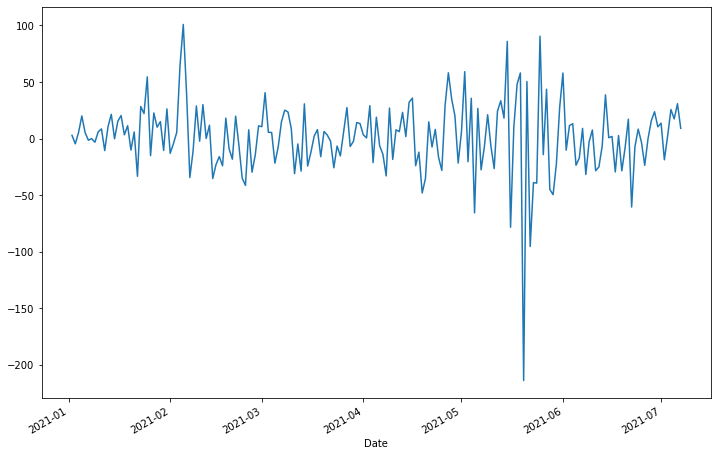

In [17]:
data.loc['2021']['Change'].plot(figsize=(12, 8))

Кумулята в Pandas   
Также на графиках изменений временных рядов можно добавить кумулятивную кривую, отражающая степень накопления предыдущих   значений. Для этой цели используется метод expanding. Например, в Python построим обычную зависимость между самой высокой ценой (High) и временем, а также добавим кумулятивные кривые среднего значения и стандартного отклонения.

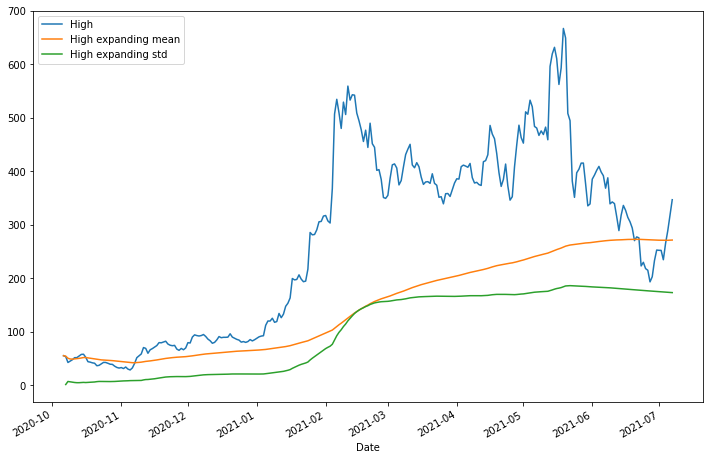

In [18]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = data.High.plot(label='High')
ax = data.High.expanding().mean().plot(label='High expanding mean')
ax = data.High.expanding().std().plot(label='High expanding std')
ax.legend()

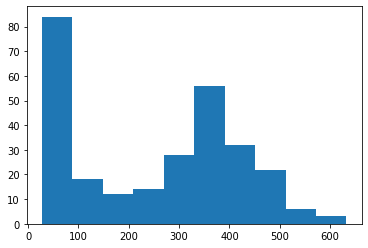

In [29]:
x = data['Close']
y = data['Date']
plt.hist(x)
plt.show() 